In [29]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [79]:

print(sys.executable)


/usr/local/bin/python3


In [2]:
#imports
%load_ext autoreload
%autoreload 2
import scipy
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
from parse_data import preprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import data_extraction.trial_list_filters as trial_list_filters
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
from IPython.display import Image, display
import data_extraction.get_indices as get_indices
import prominent_direction_functions as prominent_direction_functions
import flip_rotate_headangle_functions
import headangle_analysis_plotting_functions
import headangle_bin_assignment_new
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import calculate_probabilities_functions
import filtering_functions
import plot_headangle_vectors_colour_map
import fast_track_flip_and_rotate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import glob
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev'
json_filenames_all_social = glob.glob(r'json_social/*.json')
json_filenames_all_solo = glob.glob(r'json_solos/*.json')

In [30]:
len(json_filenames_all_solo)

74

In [4]:

json_filenames = json_filenames_all_solo
df, trial_lists = prepare_data.prepare_data(data_folder, json_filenames, combine=False)
print(len(trial_lists))
trial_lists = [trial_lists[i] + trial_lists[i+1] for i in range(0, len(trial_lists), 2)]


filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-12-20_17-36-54_ChristopherFirstSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2025-01-15_15-12-39_MarcoFirstSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-12-19_15-51-33_YeungSecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-11-12_15-44-54_FrancescaSecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-11-13_14-37-20_RyanSecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-11-12_15-11-45_SenFirstSolo.json
Loading complete.
Preprocessing comp

In [5]:
updated_lists_wallsep_solo=[]
for trial_list in range(len(trial_lists)):
    updated_list = fast_track_flip_and_rotate.process_and_update_trials_both_players_fast(trial_lists[trial_list])
    updated_lists_wallsep_solo.append(updated_list)

Computing nominator, denominator and probabilities for plots for:
45°,90°,180°
1) LW visible first
2) HW visible first
3) both walls visible at slice onset

In [46]:
fov=110 #set
wall_index=0 #for p(high)
player_id=0

#change
wall_sep=2
both=False #set to true for both walls visible at slice onset

updated=True #needed for head angle bins
inferred_choice=False #for solos


In [7]:


def apply_filters(trial_list, updated_list, wall_sep):
    """Apply filtering steps while keeping both lists aligned."""
    trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
    trial_list = [trial_list[i] for i in trial_indices]
    updated_list = [updated_list[i] for i in trial_indices]  # Ensure alignment

    if wall_sep is not None:
        trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep)
        trial_list = [trial_list[i] for i in trial_indices]
        updated_list = [updated_list[i] for i in trial_indices]  # Keep them aligned!

    return trial_list, updated_list

In [47]:
filtered_trials_nominator = {}
updated_trials_nominator = {}

for session_id, (trial_list, updated_list) in enumerate(zip(trial_lists, updated_lists_wallsep_solo)):
    trial_list, updated_list = apply_filters(trial_list, updated_list, wall_sep)

    # Initialize dictionaries properly
    filtered_trials_nominator[session_id] = {'by_player': {}}
    updated_trials_nominator[session_id] = {'by_player': {}}

    print(f"Session: {session_id}, Player: {player_id}, Trial List Length: {len(trial_list)}, Updated List Length: {len(updated_list)}")

    trial_list_filtered, updated_list_filtered, _ = filtering_functions.headangle_and_choice_nominator(trial_list, updated_list, player_id, inferred_choice, wall_index, head_angle_bin=None, updated=updated)


    filtered_trials_nominator[session_id]['by_player'][player_id] = trial_list_filtered
    updated_trials_nominator[session_id]['by_player'][player_id] = updated_list_filtered

    print(f"Completed: Session {session_id}")


Session: 0, Player: 0, Trial List Length: 29, Updated List Length: 29
Completed: Session 0
Session: 1, Player: 0, Trial List Length: 17, Updated List Length: 17
Completed: Session 1
Session: 2, Player: 0, Trial List Length: 17, Updated List Length: 17
Completed: Session 2
Session: 3, Player: 0, Trial List Length: 11, Updated List Length: 11
Completed: Session 3
Session: 4, Player: 0, Trial List Length: 18, Updated List Length: 18
Completed: Session 4
Session: 5, Player: 0, Trial List Length: 13, Updated List Length: 13
Completed: Session 5
Session: 6, Player: 0, Trial List Length: 15, Updated List Length: 15
Completed: Session 6
Session: 7, Player: 0, Trial List Length: 13, Updated List Length: 13
Completed: Session 7
Session: 8, Player: 0, Trial List Length: 13, Updated List Length: 13
Completed: Session 8
Session: 9, Player: 0, Trial List Length: 23, Updated List Length: 23
Completed: Session 9
Session: 10, Player: 0, Trial List Length: 20, Updated List Length: 20
Completed: Session 

In [48]:
filtered_trials_denominator = {}
updated_trials_denominator = {}

for session_id, (trial_list, updated_list) in enumerate(zip(trial_lists, updated_lists_wallsep_solo)):
    trial_list, updated_list = apply_filters(trial_list, updated_list, wall_sep)

    # Initialize dictionaries properly
    filtered_trials_denominator[session_id] = {'by_player': {}}
    updated_trials_denominator[session_id] = {'by_player': {}}

    print(f"Session: {session_id}, Player: {player_id}, Trial List Length: {len(trial_list)}, Updated List Length: {len(updated_list)}")

    trial_list_filtered, updated_list_filtered, _ = filtering_functions.headangle_and_choice_denominator(trial_list, updated_list, player_id, inferred_choice, head_angle_bin=None, updated=updated)
    
    filtered_trials_denominator[session_id]['by_player'][player_id] = trial_list_filtered
    updated_trials_denominator[session_id]['by_player'][player_id] = updated_list_filtered

    print(f"Completed: Session {session_id}")


Session: 0, Player: 0, Trial List Length: 29, Updated List Length: 29
Completed: Session 0
Session: 1, Player: 0, Trial List Length: 17, Updated List Length: 17
Completed: Session 1
Session: 2, Player: 0, Trial List Length: 17, Updated List Length: 17
Completed: Session 2
Session: 3, Player: 0, Trial List Length: 11, Updated List Length: 11
Completed: Session 3
Session: 4, Player: 0, Trial List Length: 18, Updated List Length: 18
Completed: Session 4
Session: 5, Player: 0, Trial List Length: 13, Updated List Length: 13
Completed: Session 5
Session: 6, Player: 0, Trial List Length: 15, Updated List Length: 15
Completed: Session 6
Session: 7, Player: 0, Trial List Length: 13, Updated List Length: 13
Completed: Session 7
Session: 8, Player: 0, Trial List Length: 13, Updated List Length: 13
Completed: Session 8
Session: 9, Player: 0, Trial List Length: 23, Updated List Length: 23
Completed: Session 9
Session: 10, Player: 0, Trial List Length: 20, Updated List Length: 20
Completed: Session 

In [49]:
from collections import defaultdict

total_counts_trials = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'by_bin': {'total_counts': 0}}))))
true_counts_trials = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'by_bin': {'true_counts': 0}}))))

# loop over the filtered trials
for session_id in filtered_trials_nominator:
    
    for bin_id in range(1,9):

        total_count = 0
        true_count = 0

        player_ids = [0]
    
        for player_id in player_ids:
            trial_list_filtered_true = filtered_trials_nominator[session_id]['by_player'][player_id][bin_id]
            trial_list_filtered = filtered_trials_denominator[session_id]['by_player'][player_id][bin_id]

            total_count += len(trial_list_filtered)
            true_count += len(trial_list_filtered_true)
            

        # store the final counts for total and true trials
        total_counts_trials[session_id]['by_bin'][bin_id]['total_counts'] = total_count
        true_counts_trials[session_id]['by_bin'][bin_id]['true_counts'] = true_count

        # debug Output
        print(f"Session {session_id}, Bin {bin_id}:")
        print(f"   ➤ Total Trials = {total_count}")
        print(f"   ➤ True Trials = {true_count}")           

Session 0, Bin 1:
   ➤ Total Trials = 3
   ➤ True Trials = 3
Session 0, Bin 2:
   ➤ Total Trials = 3
   ➤ True Trials = 3
Session 0, Bin 3:
   ➤ Total Trials = 4
   ➤ True Trials = 1
Session 0, Bin 4:
   ➤ Total Trials = 2
   ➤ True Trials = 1
Session 0, Bin 5:
   ➤ Total Trials = 7
   ➤ True Trials = 5
Session 0, Bin 6:
   ➤ Total Trials = 4
   ➤ True Trials = 3
Session 0, Bin 7:
   ➤ Total Trials = 3
   ➤ True Trials = 2
Session 0, Bin 8:
   ➤ Total Trials = 3
   ➤ True Trials = 3
Session 1, Bin 1:
   ➤ Total Trials = 1
   ➤ True Trials = 1
Session 1, Bin 2:
   ➤ Total Trials = 4
   ➤ True Trials = 4
Session 1, Bin 3:
   ➤ Total Trials = 3
   ➤ True Trials = 3
Session 1, Bin 4:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 1, Bin 5:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 1, Bin 6:
   ➤ Total Trials = 2
   ➤ True Trials = 2
Session 1, Bin 7:
   ➤ Total Trials = 4
   ➤ True Trials = 3
Session 1, Bin 8:
   ➤ Total Trials = 3
   ➤ True Trials = 1
Session 2, Bin 1:
   ➤ T

In [50]:
# initialize the dictionary to store aggregated counts across all sessions
aggregated_counts = defaultdict(lambda: {'true_counts': 0, 'total_counts': 0})

# initialize the dictionaries to store overall probabilities and bin probabilities
overall_probabilities = defaultdict(lambda: defaultdict(float))  # stores overall probabilities
bin_probabilities = defaultdict(lambda: defaultdict(dict))  # stores bin probabilities

# calculate the aggregated counts across all sessions
for session_id in total_counts_trials:
    
    for bin_id in range(1, 9):  # iterate over bins (1 to 8)
        true_counts = true_counts_trials[session_id]['by_bin'][bin_id]['true_counts']
        total_counts = total_counts_trials[session_id]['by_bin'][bin_id]['total_counts']

        # accumulate the counts for each bin across sessions
        aggregated_counts[bin_id]['true_counts'] += true_counts
        aggregated_counts[bin_id]['total_counts'] += total_counts

for bin_id in range(1,9):
    if aggregated_counts[bin_id]['true_counts'] > 0:
        total_true_counts = sum(aggregated_counts[bin_id]['true_counts']for bin_id in range(1, 9))
        print(total_true_counts)
        total_total_counts = sum(aggregated_counts[bin_id]['total_counts']for bin_id in range(1, 9))
        print(total_total_counts)


# compute overall probability
overall_probability = total_true_counts / total_total_counts if total_total_counts > 0 else None

# calculate the probability for each bin across all sessions
probabilities_by_bin = [] # list to store probabilities for each bin
total_counts_by_bin = []
true_counts_by_bin = []
probabilities_dict = {}  

for bin_id in range(1, 9):  # iterate over bins (1 to 8)
    true_counts = aggregated_counts[bin_id]['true_counts']
    total_counts = aggregated_counts[bin_id]['total_counts']

    if total_counts > 20:
        probability_chose_high_by_bin = true_counts / total_counts
        probabilities_dict[bin_id] = probability_chose_high_by_bin
        probabilities_by_bin.append(probability_chose_high_by_bin)
        total_counts_by_bin.append(total_counts)
        true_counts_by_bin.append(true_counts)

    else:
        probabilities_dict[bin_id] = None
        probabilities_by_bin.append(None)  # add None if total count is 0
        print(f"Total count is 0 for bin {bin_id}, adding probability of None")
        total_counts_by_bin.append(total_counts)
        true_counts_by_bin.append(true_counts)
        

bin_probabilities = probabilities_dict

print(f"Probabilities for each bin: {probabilities_by_bin}")
print(overall_probability)


511
625
511
625
511
625
511
625
511
625
511
625
511
625
511
625
Probabilities for each bin: [0.9714285714285714, 0.9466666666666667, 0.6756756756756757, 0.65625, 0.72, 0.8125, 0.8488372093023255, 0.9411764705882353]
0.8176


In [51]:
#do this for each
probabilities_list = []
for probability in probabilities_by_bin:
    if probability != None:
        probabilities_list.append(probability-overall_probability)
    else: probabilities_list.append(np.nan)

In [54]:
print(probabilities_list)

[0.15382857142857143, 0.12906666666666666, -0.14192432432432434, -0.16135, -0.09760000000000002, -0.005099999999999993, 0.03123720930232554, 0.12357647058823529]


In [13]:
bin_ranges = headangle_bin_assignment_new.define_45_degree_bins()
print(bin_ranges)

[(np.float64(5.8904862254808625), np.float64(0.3926990816987242)), (np.float64(0.39269908169872414), np.float64(1.1780972450961724)), (np.float64(1.1780972450961726), np.float64(1.963495408493621)), (np.float64(1.9634954084936211), np.float64(2.7488935718910694)), (np.float64(2.748893571891069), np.float64(3.5342917352885173)), (np.float64(3.5342917352885173), np.float64(4.319689898685965)), (np.float64(4.319689898685965), np.float64(5.105088062083414)), (np.float64(5.105088062083414), np.float64(5.890486225480862))]


In [38]:
probabilities_list_45_solo=probabilities_list
total_counts_by_bin_45_solo=total_counts_by_bin
true_counts_by_bin_45_solo=true_counts_by_bin
overall_probability_45_solo=overall_probability

In [52]:
probabilities_list_90_solo=probabilities_list
total_counts_by_bin_90_solo=total_counts_by_bin
true_counts_by_bin_90_solo=true_counts_by_bin
overall_probability_90_solo=overall_probability

In [25]:
probabilities_list_180_solo=probabilities_list
total_counts_by_bin_180_solo=total_counts_by_bin
true_counts_by_bin_180_solo=true_counts_by_bin
overall_probability_180_solo=overall_probability

In [14]:
probabilities_list_solo=probabilities_list
total_counts_by_bin_solo=total_counts_by_bin
true_counts_by_bin_solo=true_counts_by_bin
overall_probability_solo=overall_probability

In [39]:
%store probabilities_list_45_solo
%store total_counts_by_bin_45_solo
%store true_counts_by_bin_45_solo
%store overall_probability_45_solo

Stored 'probabilities_list_45_solo' (list)
Stored 'total_counts_by_bin_45_solo' (list)
Stored 'true_counts_by_bin_45_solo' (list)
Stored 'overall_probability_45_solo' (float)


In [40]:
print(probabilities_list_45_solo)
print(total_counts_by_bin_45_solo)

[0.032273505091722776, 0.01543160478019634, -0.0898695503353153, -0.05609617299758152, 0.0032418884681395532, 0.035250926314119635, 0.00043618353477503646, 0.05464040627832367]
[107, 96, 101, 90, 94, 113, 91, 89]


In [53]:
%store probabilities_list_90_solo
%store total_counts_by_bin_90_solo
%store true_counts_by_bin_90_solo
%store overall_probability_90_solo

Stored 'probabilities_list_90_solo' (list)
Stored 'total_counts_by_bin_90_solo' (list)
Stored 'true_counts_by_bin_90_solo' (list)
Stored 'overall_probability_90_solo' (float)


In [26]:
print(probabilities_list_90_solo)

[0.15382857142857143, 0.12906666666666666, -0.14192432432432434, -0.16135, -0.09760000000000002, -0.005099999999999993, 0.03123720930232554, 0.12357647058823529]


In [26]:
%store probabilities_list_180_solo
%store total_counts_by_bin_180_solo
%store true_counts_by_bin_180_solo
%store overall_probability_180_solo

Stored 'probabilities_list_180_solo' (list)
Stored 'total_counts_by_bin_180_solo' (list)
Stored 'true_counts_by_bin_180_solo' (list)
Stored 'overall_probability_180_solo' (float)


In [42]:
print(probabilities_list_180_solo)

[0.17298694902733325, 0.16964990787049228, -0.0154680594616311, -0.23317140874392783, -0.1720685771492929, -0.19798079290815063, 0.11026293469041559, 0.16167255326421337]


In [15]:
%store probabilities_list_solo
%store total_counts_by_bin_solo
%store true_counts_by_bin_solo
%store overall_probability_solo

Stored 'probabilities_list_solo' (list)
Stored 'total_counts_by_bin_solo' (list)
Stored 'true_counts_by_bin_solo' (list)
Stored 'overall_probability_solo' (float)


In [60]:
print(probabilities_list_solo)
print(overall_probability_solo)

[0.10889717519023567, 0.09378690861370675, -0.08412154490844914, -0.14666502179455554, -0.07551250281594957, -0.02917813861729579, 0.03845641633893082, 0.10512974867241409]
0.8450777202072539


In [45]:
bin_ranges = headangle_bin_assignment_new.define_45_degree_bins()
print(bin_ranges)

[(np.float64(5.8904862254808625), np.float64(0.3926990816987242)), (np.float64(0.39269908169872414), np.float64(1.1780972450961724)), (np.float64(1.1780972450961726), np.float64(1.963495408493621)), (np.float64(1.9634954084936211), np.float64(2.7488935718910694)), (np.float64(2.748893571891069), np.float64(3.5342917352885173)), (np.float64(3.5342917352885173), np.float64(4.319689898685965)), (np.float64(4.319689898685965), np.float64(5.105088062083414)), (np.float64(5.105088062083414), np.float64(5.890486225480862))]


In [44]:
lists = [probabilities_list_45_solo, probabilities_list_90_solo, probabilities_list_180_solo, probabilities_list_solo]
all_ratios = [x for sublist in lists for x in sublist]

all_ratios = [x for x in all_ratios if x is not None and not (isinstance(x, float) and math.isnan(x))]

print(all_ratios)

[0.032273505091722776, 0.01543160478019634, -0.0898695503353153, -0.05609617299758152, 0.0032418884681395532, 0.035250926314119635, 0.00043618353477503646, 0.05464040627832367, 0.15382857142857143, 0.12906666666666666, -0.14192432432432434, -0.16135, -0.09760000000000002, -0.005099999999999993, 0.03123720930232554, 0.12357647058823529, 0.17298694902733325, 0.16964990787049228, -0.0154680594616311, -0.23317140874392783, -0.1720685771492929, -0.19798079290815063, 0.11026293469041559, 0.16167255326421337, 0.10889717519023567, 0.09378690861370675, -0.08412154490844914, -0.14666502179455554, -0.07551250281594957, -0.02917813861729579, 0.03845641633893082, 0.10512974867241409]


In [16]:
all_ratios = [0.032273505091722776, 0.01543160478019634, -0.0898695503353153, -0.05609617299758152, 0.0032418884681395532, 0.035250926314119635, 0.00043618353477503646, 0.05464040627832367, 0.15382857142857143, 0.12906666666666666, -0.14192432432432434, -0.16135, -0.09760000000000002, -0.005099999999999993, 0.03123720930232554, 0.12357647058823529, 0.17298694902733325, 0.16964990787049228, -0.0154680594616311, -0.23317140874392783, -0.1720685771492929, -0.19798079290815063, 0.11026293469041559, 0.16167255326421337, 0.10889717519023567, 0.09378690861370675, -0.08412154490844914, -0.14666502179455554, -0.07551250281594957, -0.02917813861729579, 0.03845641633893082, 0.10512974867241409]

In [17]:
print(all_ratios)

[0.032273505091722776, 0.01543160478019634, -0.0898695503353153, -0.05609617299758152, 0.0032418884681395532, 0.035250926314119635, 0.00043618353477503646, 0.05464040627832367, 0.15382857142857143, 0.12906666666666666, -0.14192432432432434, -0.16135, -0.09760000000000002, -0.005099999999999993, 0.03123720930232554, 0.12357647058823529, 0.17298694902733325, 0.16964990787049228, -0.0154680594616311, -0.23317140874392783, -0.1720685771492929, -0.19798079290815063, 0.11026293469041559, 0.16167255326421337, 0.10889717519023567, 0.09378690861370675, -0.08412154490844914, -0.14666502179455554, -0.07551250281594957, -0.02917813861729579, 0.03845641633893082, 0.10512974867241409]


<>:37: SyntaxWarning: invalid escape sequence '\D'
<>:37: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9k/5z7zk7v17ksb961yzn2v7hz40000gn/T/ipykernel_18770/1828502135.py:37: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.text(0.5, -0.1, "$\Delta \mathrm{P}(H)$", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=14)


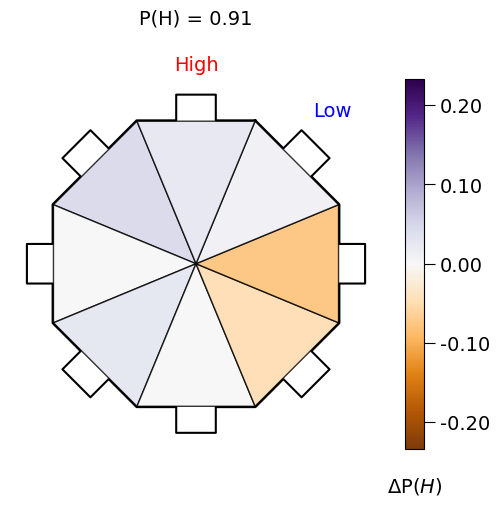

45° wall separation, combined solos


In [45]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list_45_solo, all_ratios)

#plot the ratios under the alcoves
#ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, total_counts_by_bin_45_solo, probabilities_list_45_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, total_counts_by_bin_45_solo, true_counts_by_bin_45_solo)


#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')


#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.PuOr, norm=plt.Normalize(vmax=(-1)*min(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
#cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)
cbar.ax.text(0.5, -0.1, "$\Delta \mathrm{P}(H)$", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=14)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()
cbar.ax.tick_params(labelsize=14)
cbar.ax.tick_params(size=8) 

rounded_probability_45_solo = round(overall_probability_45_solo, 2)
plt.title(f"P(H) = {rounded_probability_45_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("45° wall separation, combined solos")

<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9k/5z7zk7v17ksb961yzn2v7hz40000gn/T/ipykernel_18770/2854303127.py:41: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.text(0.5, -0.1, "$\Delta \mathrm{P}(H)$", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=14)


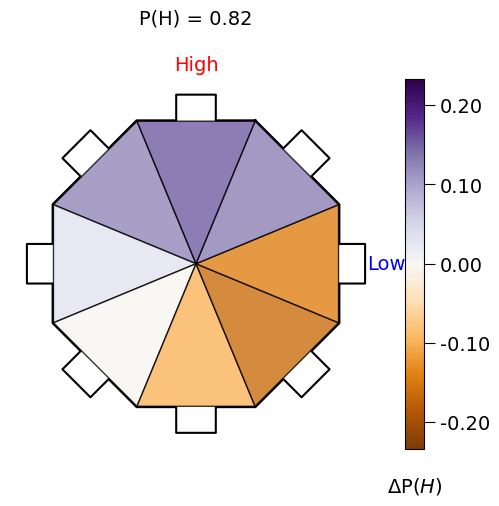

90° wall separation, combined solos


In [64]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list_90_solo, all_ratios)

#plot the ratios under the alcoves
#ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, total_counts_by_bin_90_solo, probabilities_list_90_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, total_counts_by_bin_90_solo, true_counts_by_bin_90_solo)


#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

# Get the center of the third alcove
alcove_center2_x, alcove_center2_y = alcove_centers[:, 2]

# Adjust the position slightly to the right of the third alcove's center
ax.text(alcove_center2_x + 4, alcove_center2_y, f'{"Low"}', 
        ha='center', va='center', fontsize=14, color='Blue')

# Add the high wall label
alcove_center1_x, alcove_center1_y = alcove_centers[:, 0]
ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
        ha='center', va='center', fontsize=14, color='Red')


#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.PuOr, norm=plt.Normalize(vmax=(-1)*min(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
#cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)
cbar.ax.text(0.5, -0.1, "$\Delta \mathrm{P}(H)$", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=14)


# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()
cbar.ax.tick_params(labelsize=14)
cbar.ax.tick_params(size=8) 

rounded_probability_90_solo = round(overall_probability_90_solo, 2)
plt.title(f"P(H) = {rounded_probability_90_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("90° wall separation, combined solos")

<>:37: SyntaxWarning: invalid escape sequence '\D'
<>:37: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9k/5z7zk7v17ksb961yzn2v7hz40000gn/T/ipykernel_18770/324805623.py:37: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.text(0.5, -0.1, "$\Delta \mathrm{P}(H)$", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=14)


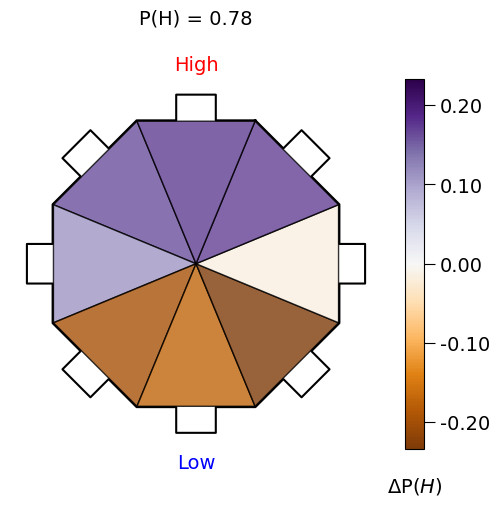

180° wall separation, combined solos


In [63]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list_180_solo, all_ratios)

#plot the ratios under the alcoves
#ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, total_counts_by_bin_180_solo, probabilities_list_180_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, total_counts_by_bin_180_solo, true_counts_by_bin_180_solo)


#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center4_x, alcove_center4_y = alcove_centers[:,4]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center4_x, alcove_center4_y - 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')


#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.PuOr, norm=plt.Normalize(vmax=(-1)*min(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
#cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)
cbar.ax.text(0.5, -0.1, "$\Delta \mathrm{P}(H)$", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=14)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks() 
cbar.ax.tick_params(labelsize=14)
cbar.ax.tick_params(size=8) 

rounded_probability_180_solo = round(overall_probability_180_solo, 2)
plt.title(f"P(H) = {rounded_probability_180_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("180° wall separation, combined solos")

<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9k/5z7zk7v17ksb961yzn2v7hz40000gn/T/ipykernel_18770/1459405209.py:25: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.text(0.5, -0.1, "$\Delta \mathrm{P}(H)$", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=14)


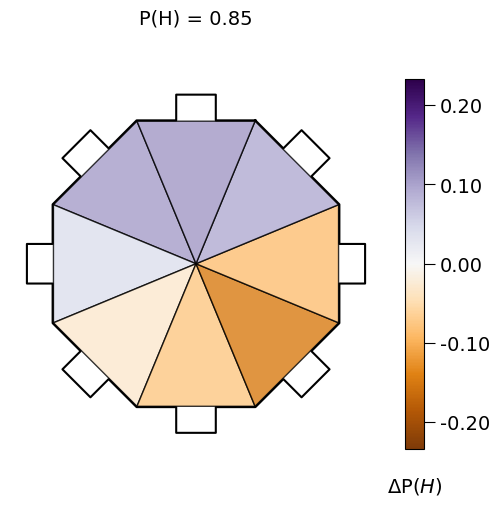

wall separations combined, combined solos


In [62]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list_solo, all_ratios)

#plot the ratios under the alcoves
#ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, total_counts_by_bin_solo, probabilities_list_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, total_counts_by_bin, true_counts_by_bin)


#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.PuOr, norm=plt.Normalize(vmax=(-1)*min(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
#cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)
cbar.ax.text(0.5, -0.1, "$\Delta \mathrm{P}(H)$", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=14)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()
cbar.ax.tick_params(labelsize=14)
cbar.ax.tick_params(size=8)

rounded_probability = round(overall_probability_solo, 2)
plt.title(f"P(H) = {rounded_probability}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("wall separations combined, combined solos")